<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 5</p><br>

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# nltk.download('stopwords')
# nltk.download('punkt')

In [5]:
from nltk.corpus import stopwords
from string import punctuation

from nltk.tokenize import word_tokenize

##
<span style="font-wight:bold;font-size:20px">1. Text Data analysis:</span> using “lincoln-last-speech.txt” which contains Lincoln’s last public address. Now answer the following questions and include your codes.

##### a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [8]:
with open("lincoln-last-speech.txt","r") as text:
    print(text.read(70))

We meet this evening, not in sorrow, but in gladness of heart. The eva


##### b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [9]:
with open("lincoln-last-speech.txt","r") as text:   # Open file
    t = text.read()
    no_punc_txt = "".join([char for char in t if char not in punctuation]) # Remove Punctuations
    
    word_tokens = word_tokenize(no_punc_txt) # Tokenize sentences to words


vWords = [word.lower() for word in word_tokens]  # Convert words to lwercase
vWords[:5] # show first 5 words

['we', 'meet', 'this', 'evening', 'not']

##### c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.

In [10]:
sWords = stopwords.words("english") # Loading English Stopwords

sWords[:5] # Showing 5 first stopwords

['i', 'me', 'my', 'myself', 'we']

##### d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [11]:
cleanWords = [word for word in vWords if (word not in sWords) ] # Dropping words in stopwords

cleanWords[:10] # showing a few of cleaned words 

['meet',
 'evening',
 'sorrow',
 'gladness',
 'heart',
 'evacuation',
 'petersburg',
 'richmond',
 'surrender',
 'principal']

##### f) Construct a bar chart showing the count of each words for the 15 most frequently used words.

In [57]:
cleanWords_sr = pd.Series(cleanWords)

frequent_words_sr = cleanWords_sr.value_counts().nlargest(15)

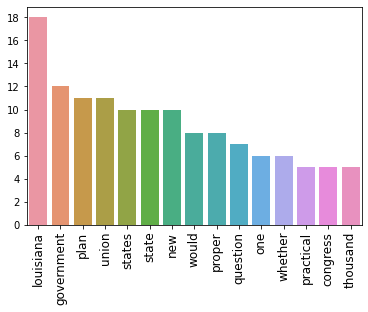

In [95]:
fig , ax = plt.subplots(ncols=1 , nrows = 1)

ax  = sns.barplot(x= frequent_words_sr.index ,y = frequent_words_sr.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90 , fontdict={"size" : 12});
ax.set_yticks(range(0,20,2));


##### h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

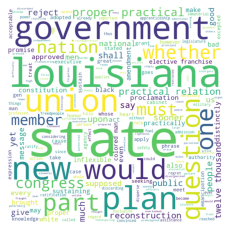

In [111]:
import wordcloud
wordcloud = wordcloud.WordCloud(width = 800, height = 800, 
                      background_color ='white', stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(" ".join(cleanWords_sr.to_list()))
 
plt.figure(figsize = (3, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##
<span style="font-wight:bold;font-size:20px">2. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


##### a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [12]:
flights_df = pd.read_csv("flights.csv")  # reading data

flights_df["is_canceled"] = flights_df["arr_time"].isna().apply(lambda x: True if x else False)  # Build is_canceled column from arrival time.
                                                                                                 # If arr_time is nan so it is canceled

canceled_flights = flights_df.groupby("month",as_index=True).sum()["is_canceled"] # group by month and sum within each month

num_flights_per_month = flights_df.groupby("month",as_index=True).size() # Number of all flights in month

canceled_flights_perc = canceled_flights*100 / num_flights_per_month # Calculate percentage of canceled flights = canceled_flights / whole_flights

In [147]:
canceled_flights_perc

month
1     1.984891
2     5.174141
3     3.090102
4     2.506177
5     2.087095
6     3.795631
7     3.544605
8     1.725373
9     1.827809
10    0.854997
11    0.927827
12    3.763995
dtype: float64

<AxesSubplot:xlabel='month'>

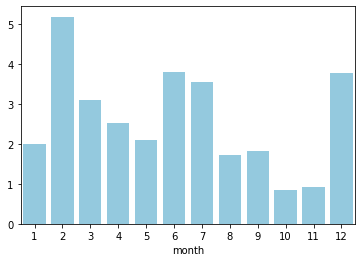

In [155]:
sns.barplot(x= canceled_flights_perc.index , y = canceled_flights_perc.values , color= "#87ceeb")

##### b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [15]:
flights_df["origin"].unique() # LaGuardia and John F. Kennedy airports both in NYC

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [16]:
flights_df_2013 = flights_df[(flights_df["date"] >= "2013") & (flights_df["date"] < "2014") ] # filter flights that where in 2013

In [17]:
(flights_df_2013[(flights_df_2013["origin"] == "LGA" ) | (flights_df_2013["origin"] == "JFK" )] # filter flights from nyc
 .groupby("tailnum") # group them by tailnum
 .size() # find number of flights by each plane
.nlargest(1)) # find largest

tailnum
N725MQ    575
dtype: int64

In [18]:
flights_df["date"] = pd.to_datetime(flights_df[["year" , "month" , "day"]]) # Create datetime object column

In [192]:
### flights per week for all planes
flights_df_2013["week_of_year"] = flights_df_2013 ["date"].dt.isocalendar().week

In [194]:
flights_per_week = flights_df_2013.groupby("week_of_year").size()

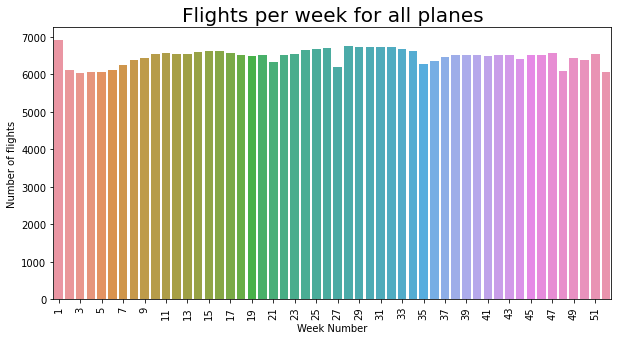

In [240]:
fig , ax = plt.subplots(ncols=1 , nrows = 1,figsize = (10,5))
ax = sns.barplot(x = flights_per_week.index , y = flights_per_week.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
ax.set_title("Flights per week for all planes" ,fontdict={"size" : 20});
ax.set_xlabel("Week Number")
ax.set_yticks(range(0,int(ax.get_yticks()[-1]),1000));
ax.set_ylabel("Number of flights");
ax.set_xticks(range(0,ax.get_xticks()[-1], 2));

In [206]:
### flights per week for N725MQ
temp = flights_df_2013[flights_df_2013["tailnum"] == "N725MQ"].groupby("week_of_year").size()

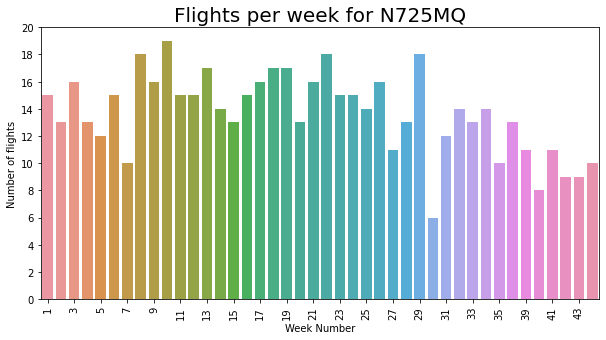

In [234]:
fig , ax = plt.subplots(ncols=1 , nrows = 1,figsize = (10,5))
ax = sns.barplot(x = temp.index , y = temp.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
ax.set_title("Flights per week for N725MQ" ,fontdict={"size" : 20});
ax.set_xlabel("Week Number")
ax.set_yticks(range(0,22,2));
ax.set_ylabel("Number of flights");
ax.set_xticks(range(0,ax.get_xticks()[-1], 2));
# ax.set_xticklabels(["do" , "Se" ],rotation = 90);


##### c) Download theuniqueane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [21]:
planes_df = pd.read_csv("planes.csv")

In [22]:
flights_from_nyc = flights_df_2013[(flights_df_2013["origin"] == "LGA" ) | (flights_df_2013["origin"] == "JFK" )] 

In [23]:
# Oldest plane from NYC:
(pd.merge(flights_from_nyc, planes_df, how = "inner" , on = "tailnum")
 .sort_values(by = "year_y")
 .reset_index()
 .loc[0])["tailnum"]

'N381AA'

In [257]:
# All planes from nyc
flights_from_nyc.tailnum.nunique()

3591

In [258]:
# How many airplanes that flew from New York City are included in the planes table?
pd.merge(flights_from_nyc, planes_df, how = "inner" , on = "tailnum").tailnum.nunique()

2888

##### d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [6]:
merged = pd.merge(planes_df ,flights_df , how= "inner" , on="tailnum" )

In [33]:
merged.groupby(["manufacturer","tailnum"],as_index=False).all()["manufacturer"].value_counts().nlargest(5)

BOEING              1630
AIRBUS INDUSTRIE     400
BOMBARDIER INC       368
AIRBUS               336
EMBRAER              299
Name: manufacturer, dtype: int64

In [44]:
df = pd.merge(flights_from_nyc, planes_df , how= "inner",on = "tailnum").groupby(["year_y" , "manufacturer" , "tailnum"],as_index=False).all()

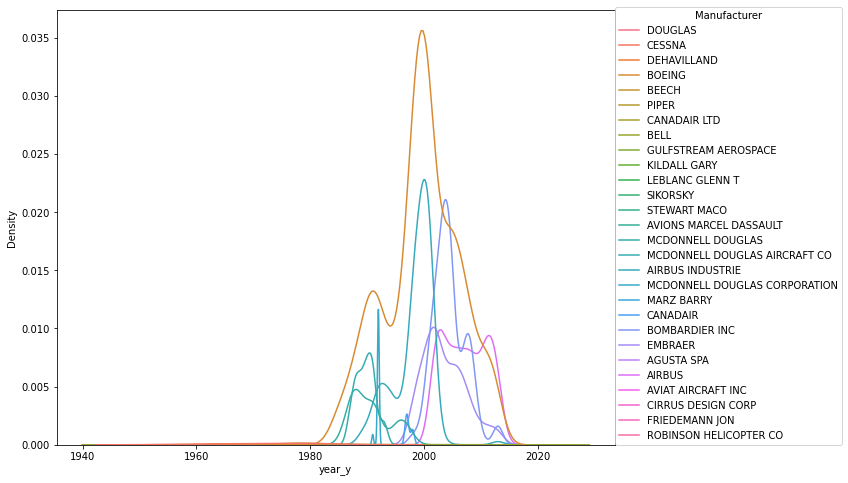

In [113]:
fig , ax = plt.subplots(1,1,figsize = (10,8))

ax = sns.kdeplot(data= df, x = "year_y" ,hue = "manufacturer",warn_singular=False, hue_order= df.manufacturer.unique())


legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, list(df.manufacturer.unique()), title='Manufacturer' , loc = (1,0))
plt.show()

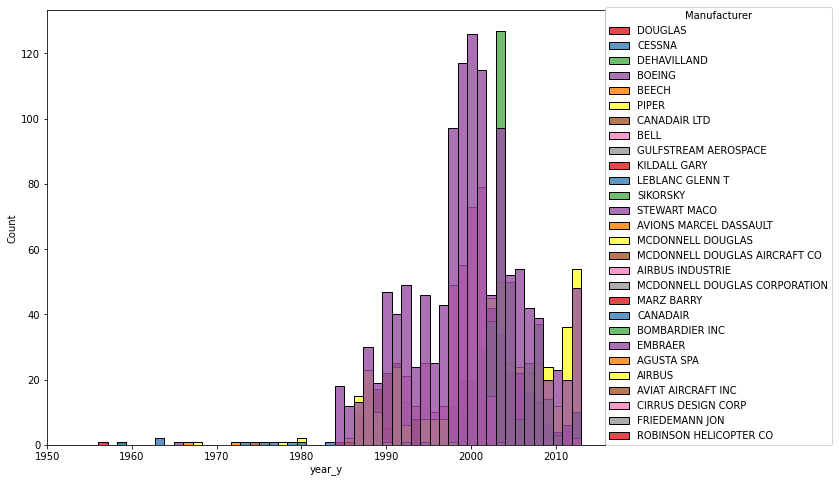

In [104]:
fig , ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.histplot(data =df  , x="year_y", hue = "manufacturer", hue_order= df.manufacturer.unique(),palette="Set1",alpha = 0.8)
ax.set_xticks(range(1950,2020,10));
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, list(df.manufacturer.unique()), title='Manufacturer' , loc = (1,0))
plt.show()

##
<span style="font-wight:bold;font-size:20px">3. Regular Expressions:</span> Write a regular expression to match patterns in the following strings. Demonstrate
that your regular expression indeed matched that pattern by including codes and results.

In [2]:
import re

##### a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [115]:
vText = ['google','logo','dig', 'blog', 'boogie']

In [116]:
subed = []
for item in vText:
    subed.append(re.sub(r"o?go?","." , item))

In [117]:
subed


['..le', 'l.', 'di.', 'bl.', 'bo.ie']

##### b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [118]:
vPhone = ['874','6783','345345', '32120', '468349', '8149674']

In [120]:
subed = []
for num in vPhone:
    subed.append(re.sub(r"^([0-9]{5,6})$","Found" , num))
    
subed

['874', '6783', 'Found', 'Found', 'Found', '8149674']

##### c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [121]:
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"

In [127]:
re.sub(r"[^A-Za-z ]" , "" , myText)

'you got the solution correct'

##### d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [129]:
myText = "Each of the three and four character words will be gone now"

In [135]:
re.sub(r"\b[a-zA-Z]{3,4}\b" , "..." , myText)

'... of ... three ... ... character words ... be ... ...'

##### e) Extract all the three numbers embedded in the following text.

In [136]:
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'

In [137]:
re.findall(r"\d{1,}" ,bigText )


['20', '14', '989', '500']

##### f) Extract all the words between parenthesis from the following string text and count number of words.

In [203]:
myText = 'The salries are reported (in millions) for every company.'

In [204]:
re.findall(r"\([a-zA-Z\s]*\)" ,myText)

['(in millions)']

In [205]:
s = re.search(r"\([a-zA-Z\s]*\)" ,myText)

In [206]:
s.group()

'(in millions)'

##### g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [4]:
myText = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]

In [239]:
for item in myText:
    print(re.findall(r"(\_[A-Za-z\-\s]+\.)" ,item )[0][1:-1])


bill
pay
fine-book


In [5]:
[re.findall(r"(?<=_)[\w+\-][^\_]*(?=\.)" ,item )[0] for item in myText]

['bill', 'pay', 'fine-book']

##### h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [2]:
myText = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'

In [3]:
re.findall(r"\d+(?= ?(?:(?:ml)|(?:lb))\W)" , myText)

['200', '15', '2']

##### i) Extract only the word in between pair of symbols \\$. Count number of words you have found between pairs of dollar sign \\$

In [4]:
myText = 'Math symbols are $written$ in $between$ dollar $signs$'

In [5]:
re.findall(r"(?<=\$)\w+(?=\$)" , myText)

['written', 'between', 'signs']

##### j) Extract all the valid equations in the following text.

In [2]:
myText = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'

In [3]:
re.findall(r"[0-9]+ *[\+\-\*\/\^\%]{1} *[0-9]+\ *= *[0-9]+" ,myText )

['2+3=5', '2*3=6']